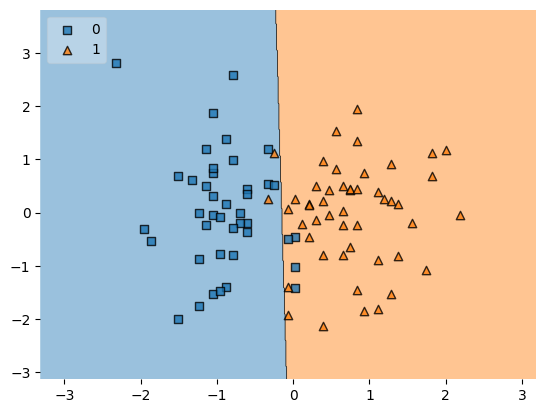

In [32]:
# Steps:

# Extract input output cols

import pandas as pd
import numpy as np

df = pd.read_csv('/content/placement-dataset.csv')

# 1.a) Preprocessing (df.info()shows missing vals)
# df.info()

# Means first col onwards data needed.
df = df.iloc[:,1:]
df.head()

# 1.b)EDA
import matplotlib.pyplot as plt
# Shows kon konsi logon ki placement hui.

# plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# Applying logistic regression.
# 1.c)Feature Selection

# 2) Extract input output cols:
# Inputs(CGPA,IQ col) 2D tensor
X = df.iloc[:,0:2]
# Output(Placement col) 1D tensor
y = df.iloc[:,-1]

# 3) Train test split
from sklearn.model_selection import train_test_split as tts

# 10% data in test set 90 in training set
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.1)

# 4) Scaling values:
from sklearn.preprocessing import StandardScaler as SS
scalar = SS()

# Scaling vals between 0 and 1
X_train = scalar.fit_transform(X_train)

X_train

X_test = scalar.transform(X_test)

# 5) Train model: Logistic in this case:
from sklearn.linear_model import LogisticRegression as LR

clf = LR()
# Model training part:
clf.fit(X_train,y_train)



# 6) Evaluate model
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score as AS
AS(y_test,y_pred)

# Plotting selected line:
from mlxtend.plotting import plot_decision_regions as PDR

PDR(X_train,y_train.values,clf=clf,legend=2)

# 7) Deploying on cloud:
import pickle
pickle.dump(clf,open('model.pkl','wb'))